In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
colnames=['Gender','Age','AgeDebt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']
df=pd.read_csv('/content/cc_approvals.data',names=colnames,header=None)

In [3]:
df.head()

,Gender,Age,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   AgeDebt         690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
df.shape

(690, 16)

In [6]:
df.isnull().sum()

Gender            0
Age               0
AgeDebt           0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(690, 16)

In [8]:
df['Real_Age']=df['Age'].apply(lambda x : x.split('.')[0])
df.head()

,Gender,Age,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Real_Age
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,30
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,58
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,24
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,27
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,20


In [9]:
df['AgeDebt'].value_counts()

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: AgeDebt, Length: 215, dtype: int64

In [10]:
error_rows=(list(df[df['Real_Age']=='?'].index))
dropped_rows=set(error_rows)
error_rows,dropped_rows,

([83, 86, 92, 97, 254, 286, 329, 445, 450, 500, 515, 608],
 {83, 86, 92, 97, 254, 286, 329, 445, 450, 500, 515, 608})

In [11]:
df.drop(error_rows,axis=0,inplace=True)

In [12]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(678, 17)

In [13]:
df.head()

,Gender,Age,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Real_Age
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,30
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,58
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,24
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,27
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,20


In [14]:
df['Married'].value_counts()

u    511
y    159
?      6
l      2
Name: Married, dtype: int64

In [15]:
dropped_new_rows=list(df[df['Married']=='?'].index)
dropped_new_rows

[202, 265, 323, 447, 581, 610]

In [16]:
df.drop(dropped_new_rows,axis=0,inplace=True)


In [17]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(672, 17)

In [18]:
df['BankCustomer'].value_counts()

g     511
p     159
gg      2
Name: BankCustomer, dtype: int64

In [19]:
df['EducationLevel'].value_counts(),df['Ethnicity'].value_counts()	

(c     136
 q      78
 w      64
 i      57
 aa     53
 ff     51
 k      50
 cc     41
 m      38
 x      36
 d      27
 e      25
 j      10
 r       3
 ?       3
 Name: EducationLevel, dtype: int64, v     391
 h     138
 bb     57
 ff     55
 j       8
 z       8
 dd      6
 n       4
 ?       3
 o       2
 Name: Ethnicity, dtype: int64)

In [20]:
dropped_rows1=list(df[df['EducationLevel']=='?'].index)
dropped_rows2=list(df[df['Ethnicity']=='?'].index)


In [21]:
dropped_rows2

[466, 524, 585]

In [22]:
df.drop(dropped_rows1,axis=0,inplace=True)


In [23]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(669, 17)

In [24]:
df['PriorDefault'].value_counts(),df['Employed'].value_counts(),df['CreditScore'].value_counts(),df['DriversLicense'].value_counts(),df['Citizen'].value_counts()

(t    354
 f    315
 Name: PriorDefault, dtype: int64, f    376
 t    293
 Name: Employed, dtype: int64, 0     376
 1      71
 2      44
 3      27
 6      23
 11     19
 5      18
 7      16
 4      15
 9      10
 8      10
 10      8
 14      8
 12      8
 15      4
 16      3
 20      2
 17      2
 23      1
 40      1
 67      1
 13      1
 19      1
 Name: CreditScore, dtype: int64, f    361
 t    308
 Name: DriversLicense, dtype: int64, g    613
 s     54
 p      2
 Name: Citizen, dtype: int64)

In [25]:
	df['ZipCode'].value_counts(),df['Income'].value_counts()

(00000    128
 00120     35
 00200     34
 00160     34
 00100     30
         ... 
 00021      1
 00393      1
 00395      1
 00093      1
 00256      1
 Name: ZipCode, Length: 169, dtype: int64, 0       281
 1        27
 1000     10
 500      10
 2         9
        ... 
 8851      1
 7059      1
 1704      1
 857       1
 750       1
 Name: Income, Length: 235, dtype: int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          669 non-null    object 
 1   Age             669 non-null    object 
 2   AgeDebt         669 non-null    float64
 3   Married         669 non-null    object 
 4   BankCustomer    669 non-null    object 
 5   EducationLevel  669 non-null    object 
 6   Ethnicity       669 non-null    object 
 7   YearsEmployed   669 non-null    float64
 8   PriorDefault    669 non-null    object 
 9   Employed        669 non-null    object 
 10  CreditScore     669 non-null    int64  
 11  DriversLicense  669 non-null    object 
 12  Citizen         669 non-null    object 
 13  ZipCode         669 non-null    object 
 14  Income          669 non-null    int64  
 15  Approved        669 non-null    object 
 16  Real_Age        669 non-null    object 
dtypes: float64(2), int64(2), object(13)

In [27]:
df.head(3)

,Gender,Age,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Real_Age
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,30
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,58
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,24


In [28]:
df['ZipCode'].unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '?', '00980', '00443', '00140', '00094',
       '00368', '00288', '00188', '00112', '00171', '00268', '00167',
       '00075', '00152', '00176', '00329', '00212', '00410', '00274',
       '00375', '00408', '00350', '00204', '00040', '00181', '00399',
       '00440', '00093', '00060', '00395', '00393', '00021', '00029',
       '00102', '00431', '00370', '00024', '00020', '00129', '00510',
       '00195', '00144', '00380', '00049', '00050', '00381', '00150',
       '00117', '00056', '00211', '00230', '00156', '00022', '00228',
       '00519', '00253', '00487', '00220', '00088', '00073', '00121',
       '00470',

In [29]:
dropped_rows3=list(df[df['ZipCode']=='?'].index)
df.drop(dropped_rows3,axis=0,inplace=True)



In [30]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(663, 17)

In [31]:
df['Real_Age']=df['Real_Age'].astype(int)
df['ZipCode']=df['ZipCode'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          663 non-null    object 
 1   Age             663 non-null    object 
 2   AgeDebt         663 non-null    float64
 3   Married         663 non-null    object 
 4   BankCustomer    663 non-null    object 
 5   EducationLevel  663 non-null    object 
 6   Ethnicity       663 non-null    object 
 7   YearsEmployed   663 non-null    float64
 8   PriorDefault    663 non-null    object 
 9   Employed        663 non-null    object 
 10  CreditScore     663 non-null    int64  
 11  DriversLicense  663 non-null    object 
 12  Citizen         663 non-null    object 
 13  ZipCode         663 non-null    int64  
 14  Income          663 non-null    int64  
 15  Approved        663 non-null    object 
 16  Real_Age        663 non-null    int64  
dtypes: float64(2), int64(4), object(11)

In [32]:
df['Approved'].value_counts()

-    364
+    299
Name: Approved, dtype: int64

In [33]:
df['Approved']=df['Approved'].map({'-':0,'+':1})
df.head()

,Gender,Age,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Real_Age
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1,30
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1,58
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1,24
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1,27
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1,20


In [34]:
df.drop('Age',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          663 non-null    object 
 1   AgeDebt         663 non-null    float64
 2   Married         663 non-null    object 
 3   BankCustomer    663 non-null    object 
 4   EducationLevel  663 non-null    object 
 5   Ethnicity       663 non-null    object 
 6   YearsEmployed   663 non-null    float64
 7   PriorDefault    663 non-null    object 
 8   Employed        663 non-null    object 
 9   CreditScore     663 non-null    int64  
 10  DriversLicense  663 non-null    object 
 11  Citizen         663 non-null    object 
 12  ZipCode         663 non-null    int64  
 13  Income          663 non-null    int64  
 14  Approved        663 non-null    int64  
 15  Real_Age        663 non-null    int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 83.0+ KB


In [35]:
def CPlot(data,feature) : 
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(data,feature,Limit=0) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(data[feature], shade=True)
    else : 
        Data = data[data[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)
def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
        
def JPlot(data,feature1,feature2,Type = 'scatter') : 
    sns.jointplot(data=data, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     

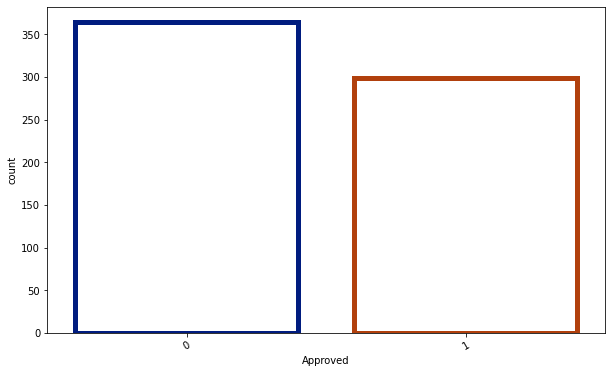

In [36]:
CPlot(df,'Approved')

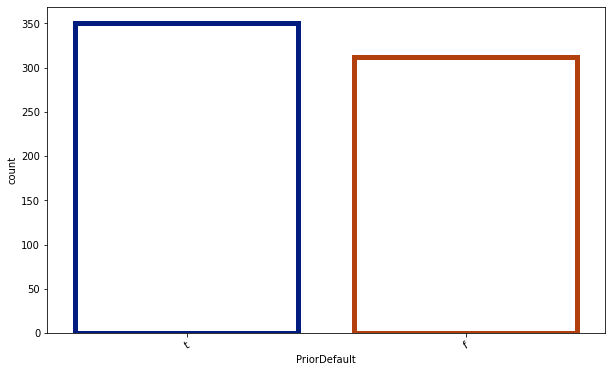

In [37]:
CPlot(df,'PriorDefault')

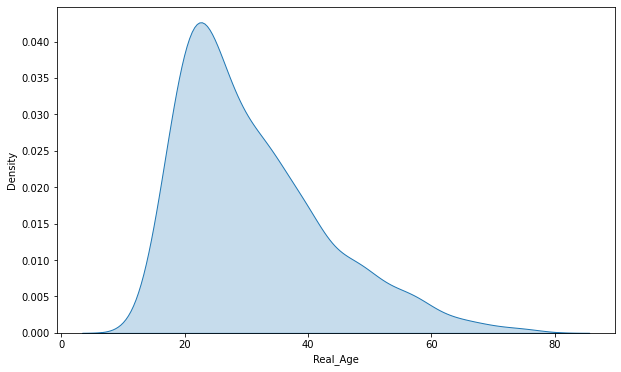

In [38]:
KPlot(df,'Real_Age')

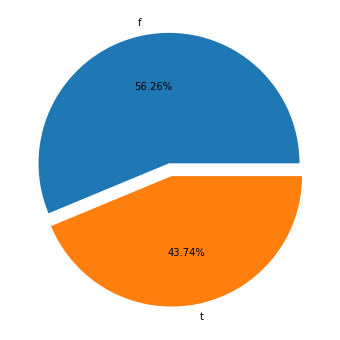

In [39]:
Pie(df,'Employed')

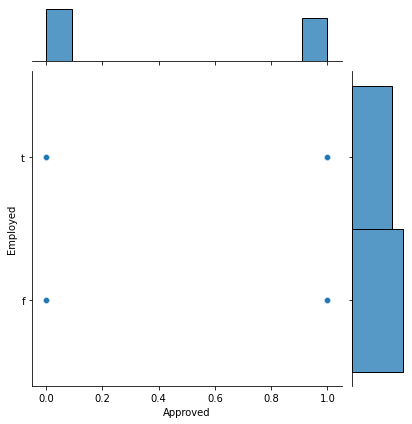

In [40]:
JPlot(df,'Approved','Employed')

In [41]:
df.columns

Index(['Gender', 'AgeDebt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved',
       'Real_Age'],
      dtype='object')

In [42]:
EncodedFeatures = ['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen']

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
def ApplyEncoder(OriginalColumn) : 
    global df
    Encoder = LabelEncoder()
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [45]:
for Col in EncodedFeatures : 
    df[f'Enc_{Col}'] = ApplyEncoder(Col)
df.head()

,Gender,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,...,Real_Age,Enc_Gender,Enc_Married,Enc_BankCustomer,Enc_EducationLevel,Enc_Ethnicity,Enc_PriorDefault,Enc_Employed,Enc_DriversLicense,Enc_Citizen
0,b,0.000,u,g,w,v,1.25,t,t,1,...,30,2,1,0,12,7,1,1,0,0
1,a,4.460,u,g,q,h,3.04,t,t,6,...,58,1,1,0,10,3,1,1,0,0
2,a,0.500,u,g,q,h,1.50,t,f,0,...,24,1,1,0,10,3,1,0,0,0
3,b,1.540,u,g,w,v,3.75,t,t,5,...,27,2,1,0,12,7,1,1,1,0
4,b,5.625,u,g,w,v,1.71,t,f,0,...,20,2,1,0,12,7,1,0,0,2


In [46]:
pd.set_option('display.max_columns',None)
df.head()

,Gender,AgeDebt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Real_Age,Enc_Gender,Enc_Married,Enc_BankCustomer,Enc_EducationLevel,Enc_Ethnicity,Enc_PriorDefault,Enc_Employed,Enc_DriversLicense,Enc_Citizen
0,b,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1,30,2,1,0,12,7,1,1,0,0
1,a,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1,58,1,1,0,10,3,1,1,0,0
2,a,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1,24,1,1,0,10,3,1,0,0,0
3,b,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1,27,2,1,0,12,7,1,1,1,0
4,b,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1,20,2,1,0,12,7,1,0,0,2


In [47]:
df.drop(['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'],axis=1,inplace=True)
df.head()

,AgeDebt,YearsEmployed,CreditScore,ZipCode,Income,Approved,Real_Age,Enc_Gender,Enc_Married,Enc_BankCustomer,Enc_EducationLevel,Enc_Ethnicity,Enc_PriorDefault,Enc_Employed,Enc_DriversLicense,Enc_Citizen
0,0.000,1.25,1,202,0,1,30,2,1,0,12,7,1,1,0,0
1,4.460,3.04,6,43,560,1,58,1,1,0,10,3,1,1,0,0
2,0.500,1.50,0,280,824,1,24,1,1,0,10,3,1,0,0,0
3,1.540,3.75,5,100,3,1,27,2,1,0,12,7,1,1,1,0
4,5.625,1.71,0,120,0,1,20,2,1,0,12,7,1,0,0,2


In [48]:
x=df.drop(['Approved'],axis=1)
y=df['Approved']


In [49]:
from sklearn.model_selection import train_test_split


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=45)

In [52]:
x_train.shape

(530, 15)

In [53]:
y_train.shape

(530,)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

LinearModel = LogisticRegression(fit_intercept=True,n_jobs=-1)

RandomForestModel = RandomForestClassifier(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingClassifier(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVCModel = SVC(C = 1.0 ,kernel = 'rbf') 
DecisionTreeModel = DecisionTreeClassifier( max_depth=3,random_state=33)
KNeighborsModel = KNeighborsClassifier(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearModel,RandomForestModel,GBRModel,SVCModel,DecisionTreeModel,KNeighborsModel]


In [55]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(x_train, y_train)
    print(f'Train Score is : {Model.score(x_train, y_train)}')
    print(f'Test Score is : {Model.score(x_test, y_test)}')
    y_pred = Model.predict(x_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')


for Model LogisticRegression
Train Score is : 0.8641509433962264
Test Score is : 0.8195488721804511
MAE value is  : 0.18045112781954886
MSE value is  : 0.18045112781954886
MdSE value is  : 0.0
for Model RandomForestClassifier
Train Score is : 0.9792452830188679
Test Score is : 0.8646616541353384
MAE value is  : 0.13533834586466165
MSE value is  : 0.13533834586466165
MdSE value is  : 0.0
for Model GradientBoostingClassifier
Train Score is : 1.0
Test Score is : 0.8571428571428571
MAE value is  : 0.14285714285714285
MSE value is  : 0.14285714285714285
MdSE value is  : 0.0
for Model SVC
Train Score is : 0.6641509433962264
Test Score is : 0.6390977443609023
MAE value is  : 0.3609022556390977
MSE value is  : 0.3609022556390977
MdSE value is  : 0.0
for Model DecisionTreeClassifier
Train Score is : 0.879245283018868
Test Score is : 0.8421052631578947
MAE value is  : 0.15789473684210525
MSE value is  : 0.15789473684210525
MdSE value is  : 0.0
for Model KNeighborsClassifier
Train Score is : 0.79

In [56]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

SelectedModel = RandomForestClassifier(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(x_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                   params  \
0          0.873585        0.005660    {'max_depth': 2, 'n_estimators': 100}   
1          0.869811        0.005660    {'max_depth': 2, 'n_estimators': 200}   
2          0.867925        0.007547    {'max_depth': 2, 'n_estimators': 500}   
3          0.873585        0.005660   {'max_depth': 2, 'n_estimators': 1000}   
4          0.890566        0.003774    {'max_depth': 4, 'n_estimators': 100}   
5          0.883019        0.003774    {'max_depth': 4, 'n_estimators': 200}   
6          0.884906        0.005660    {'max_depth': 4, 'n_estimators': 500}   
7          0.888679        0.005660   {'max_depth': 4, 'n_estimators': 1000}   
8          0.886792        0.003774    {'max_depth': 8, 'n_estimators': 100}   
9          0.888679        0.005660    {'max_depth': 8, 'n_estimators': 200}   
10         0.881132        0.001887    {'max_depth': 8, 'n_estimators': 500}   
11         0.884906  

In [57]:

SelectedModel = GradientBoostingClassifier(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10],'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(x_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist

All Results are :
     mean_test_score  std_test_score  \
0          0.877358        0.020755   
1          0.871698        0.022642   
2          0.860377        0.026415   
3          0.852830        0.022642   
4          0.862264        0.016981   
..              ...             ...   
59         0.847170        0.016981   
60         0.830189        0.015094   
61         0.818868        0.000000   
62         0.816981        0.001887   
63         0.816981        0.001887   

                                               params  rank_test_score  \
0   {'criterion': 'friedman_mse', 'max_depth': 2, ...                1   
1   {'criterion': 'friedman_mse', 'max_depth': 2, ...                4   
2   {'criterion': 'friedman_mse', 'max_depth': 2, ...               13   
3   {'criterion': 'friedman_mse', 'max_depth': 2, ...               26   
4   {'criterion': 'friedman_mse', 'max_depth': 4, ...               10   
..                                                ...              .

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

In [60]:
model=RandomForestClassifier(max_depth=4).fit(x_train,y_train)